In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import brown
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [2]:
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('evaluation.xlsx')

In [3]:
train_data.head()

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0
2,this app is very good for video conferencing.,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0


In [9]:
#avg text
s = 0
len_ = []
for i in range(train_data.shape[0]):
    len_.append(len(train_data.iloc[i][0].split(' ')))
max(len_)    

66

In [11]:
len(train_data.iloc[0][1].split(' '))

6

In [4]:
test_data.head()

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0


In [15]:
#avg text
s = 0
#len_ = []
for i in range(test_data.shape[0]):
    s += len(test_data.iloc[i][0].split(' '))
s/test_data.shape[0]

17.386777777777777

In [5]:
train_pair_data = []
for i in range(train_data.shape[0]):
    train_pair_data.append(train_data.iloc[i][0] +' '+ train_data.iloc[i][1])

In [6]:
train_pair_data

['this is an amazing app for online classes!but good app for conducting online classes',
 'very practical and easy to use app is user-friendly',
 'this app is very good for video conferencing. good for video conferencing',
 'i can not download this zoom app unable to download zoom app',
 'i am not able to download this app want to download the app',
 'zoom is not working properly app is not working',
 'zoom is an excellent meeting app. good app for conducting online meeting',
 'i am not getting the virtual background option in the settings unable to switch virtual background',
 'video quality is very poor video quality is poor',
 'i am unable to sign-in want to login',
 'zoom does not update me anymore want to update zoom app',
 'the app does not install unable to install',
 'best app for video calling and office meeting and online classes good app for conducting online classes and meetings',
 'i can not connect to my meeting. want to connect to meetings',
 'my audio is not working ple

In [7]:
def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    #text = re.sub(r"!", " ! ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"-"," ",text)
    text = re.sub(r"  "," ",text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [8]:
train_pair_data = [text_to_wordlist(x) for x in train_pair_data]

In [9]:
train_pair_data

['amazing app online classes but good app conducting online classes',
 'practical easy use app user  friendly',
 'app good video conferencing good video conferencing',
 'download zoom app unable download zoom app',
 'able download app want download app',
 'zoom working properly app working',
 'zoom excellent meeting app good app conducting online meeting',
 'getting virtual background option settings unable switch virtual background',
 'video quality poor video quality poor',
 'unable sign  in want login',
 'zoom update anymore want update zoom app',
 'app install unable install',
 'best app video calling office meeting online classes good app conducting online classes meetings',
 'connect meeting want connect meetings',
 'audio working please fix problem sound stopped working',
 'use google meet instead google meet better',
 'found problem sometimes would work password receiving incorrect password message',
 'let sign up want sign',
 'zoom bad app poor quality application',
 'edit pro

In [10]:
t_train = Tokenizer()
t_train.fit_on_texts(train_pair_data)

In [211]:
t_train.word_index['want']

1

In [212]:
train_vocab = t_train.word_index

In [213]:
len(train_vocab)

2490

In [214]:
train_key = list(train_vocab.keys())

In [215]:
list(train_key)

['want',
 'app',
 'good',
 'zoom',
 'unable',
 'video',
 'screen',
 'meeting',
 'use',
 'background',
 'bad',
 'quality',
 'phone',
 'audio',
 'time',
 'android',
 'update',
 'connect',
 'work',
 'add',
 'sound',
 'option',
 'meetings',
 'please',
 'working',
 'tv',
 'change',
 'application',
 'mobile',
 'watch',
 'picture',
 'even',
 'download',
 'ipad',
 'virtual',
 'get',
 'open',
 'version',
 'put',
 'account',
 'getting',
 'without',
 'able',
 'camera',
 'chat',
 'login',
 'movies',
 'sign',
 'join',
 'language',
 'enter',
 'issues',
 'poor',
 'settings',
 'error',
 'devices',
 'install',
 'tablet',
 'online',
 'better',
 'connection',
 'share',
 'let',
 'slow',
 'class',
 'like',
 'play',
 'conference',
 'service',
 'password',
 'support',
 'device',
 'using',
 'cannot',
 'room',
 'subtitles',
 'watching',
 'would',
 'people',
 'data',
 'need',
 'live',
 'problem',
 'great',
 'crashes',
 'could',
 'turn',
 'easy',
 'profile',
 'facing',
 'one',
 'keeps',
 'classes',
 'access',
 '

In [21]:
test_data.iloc[0][2]

1.0

In [141]:
test_pair_data_0 = []
test_pair_data_1 = []
for i in range(test_data.shape[0]):
    if test_data.iloc[i][2] == 0.0:
        test_pair_data_0.append(test_data.iloc[i][0] +' '+ test_data.iloc[i][1])
    else:
        test_pair_data_1.append(test_data.iloc[i][0] +' '+ test_data.iloc[i][1])

In [142]:
len(test_pair_data_0)

5999

In [143]:
test_pair_data = test_pair_data_0 + test_pair_data_1 

In [144]:
len(test_pair_data)

9000

In [145]:
test_pair_data_0 = [text_to_wordlist(x) for x in test_pair_data_0 ]

In [146]:
t_test_0 = Tokenizer()
t_test_0 .fit_on_texts(test_pair_data_0)
test_vocab_0 = t_test_0.word_index

In [147]:
len(test_vocab_0)

5843

In [148]:
test_key_0 =list(test_vocab_0.keys())

In [149]:
test_pair_data_1 = [text_to_wordlist(x) for x in test_pair_data_1 ]

In [150]:
t_test_1 = Tokenizer()
t_test_1 .fit_on_texts(test_pair_data_1)
test_vocab_1 = t_test_1.word_index

In [151]:
test_key_1 = list(test_vocab_1.keys())

In [152]:
len(test_key_1)

3389

In [175]:
test_key = test_key_1 + test_key_0

In [217]:
len(test_key)

9232

## vocsb visualization

In [153]:
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


glove_file = datapath("/home/rohit/datasets/glove.6B.100d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

filename = 'glove2word2vec_model.sav'
pickle.dump(model, open(filename, 'wb'))

/tmp/ipykernel_1874/1170287047.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


In [ ]:
import pickle

filename = 'glove2word2vec_model.sav'
model = pickle.load(open(filename, 'rb'))

def append_list(sim_words, words):
    
    list_of_words = []
    
    for i in range(len(sim_words)):
        
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
        
    return list_of_words

input_word = 'school'
user_input = [x.strip() for x in input_word.split(',')]
result_word = []
    
for words in user_input:
    
        sim_words = model.most_similar(words, topn = 5)
        sim_words = append_list(sim_words, words)
            
        result_word.extend(sim_words)
    
similar_word = [word[0] for word in result_word]
similarity = [word[1] for word in result_word] 
similar_word.extend(user_input)
labels = [word[2] for word in result_word]
label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
color_map = [label_dict[x] for x in labels]

In [154]:

embedding_index = dict()
f = open('/home/rohit/datasets/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coef
f.close()
print('Loaded %s word vectors.' % len(embedding_index))

Loaded 400000 word vectors.


In [155]:
train_key

['want',
 'app',
 'good',
 'zoom',
 'unable',
 'video',
 'screen',
 'meeting',
 'use',
 'background',
 'bad',
 'quality',
 'phone',
 'audio',
 'time',
 'android',
 'update',
 'connect',
 'work',
 'add',
 'sound',
 'option',
 'meetings',
 'please',
 'working',
 'tv',
 'change',
 'application',
 'mobile',
 'watch',
 'picture',
 'even',
 'download',
 'ipad',
 'virtual',
 'get',
 'open',
 'version',
 'put',
 'account',
 'getting',
 'without',
 'able',
 'camera',
 'chat',
 'login',
 'movies',
 'sign',
 'join',
 'language',
 'enter',
 'issues',
 'poor',
 'settings',
 'error',
 'devices',
 'install',
 'tablet',
 'online',
 'better',
 'connection',
 'share',
 'let',
 'slow',
 'class',
 'like',
 'play',
 'conference',
 'service',
 'password',
 'support',
 'device',
 'using',
 'cannot',
 'room',
 'subtitles',
 'watching',
 'would',
 'people',
 'data',
 'need',
 'live',
 'problem',
 'great',
 'crashes',
 'could',
 'turn',
 'easy',
 'profile',
 'facing',
 'one',
 'keeps',
 'classes',
 'access',
 '

In [156]:
embedding_index['connect']

array([-0.44668  , -0.143    , -0.27359  , -0.47119  ,  0.21982  ,
       -0.14366  , -0.2436   , -0.22676  , -0.0061196, -0.89575  ,
       -0.29156  , -0.02565  ,  0.09814  , -0.36942  ,  0.60543  ,
       -0.032824 , -0.51424  , -0.27752  ,  0.37282  ,  0.13967  ,
       -0.27536  , -0.16082  ,  0.017231 , -0.20588  , -0.21891  ,
       -0.046492 ,  0.15284  ,  0.83124  ,  0.18586  ,  0.086269 ,
        0.68639  ,  0.29866  , -0.006433 ,  0.38416  , -0.24637  ,
       -0.017337 , -0.077678 , -0.12573  ,  0.48372  , -0.23112  ,
       -0.37912  , -0.022945 , -0.75448  , -0.14826  ,  0.46602  ,
        0.48988  ,  0.43976  ,  0.19323  , -0.19264  , -0.24055  ,
        0.28842  ,  0.36352  ,  0.10055  , -0.5867   ,  0.20801  ,
       -0.032919 ,  0.10251  ,  0.13698  , -0.68024  ,  0.15823  ,
       -0.090988 , -0.086861 ,  0.047797 , -0.10065  ,  0.74661  ,
        1.0547   , -0.20301  ,  0.70587  ,  0.014045 ,  0.64584  ,
        0.073711 , -0.4075   ,  0.48296  ,  0.37358  ,  0.5251

In [191]:
def tsne_plot(keys):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in keys:
        if word in embedding_index:
            tokens.append(embedding_index[word])
            labels.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=800, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    plt.show()

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


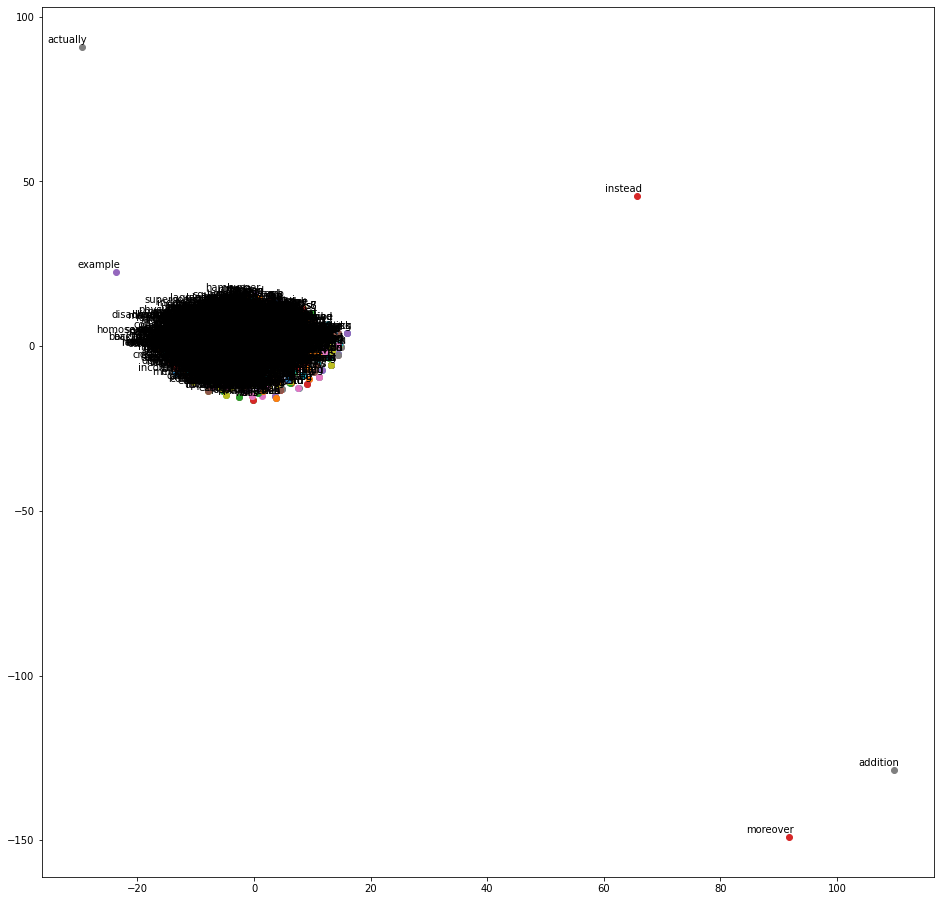

In [184]:
tsne_plot(train_key)

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


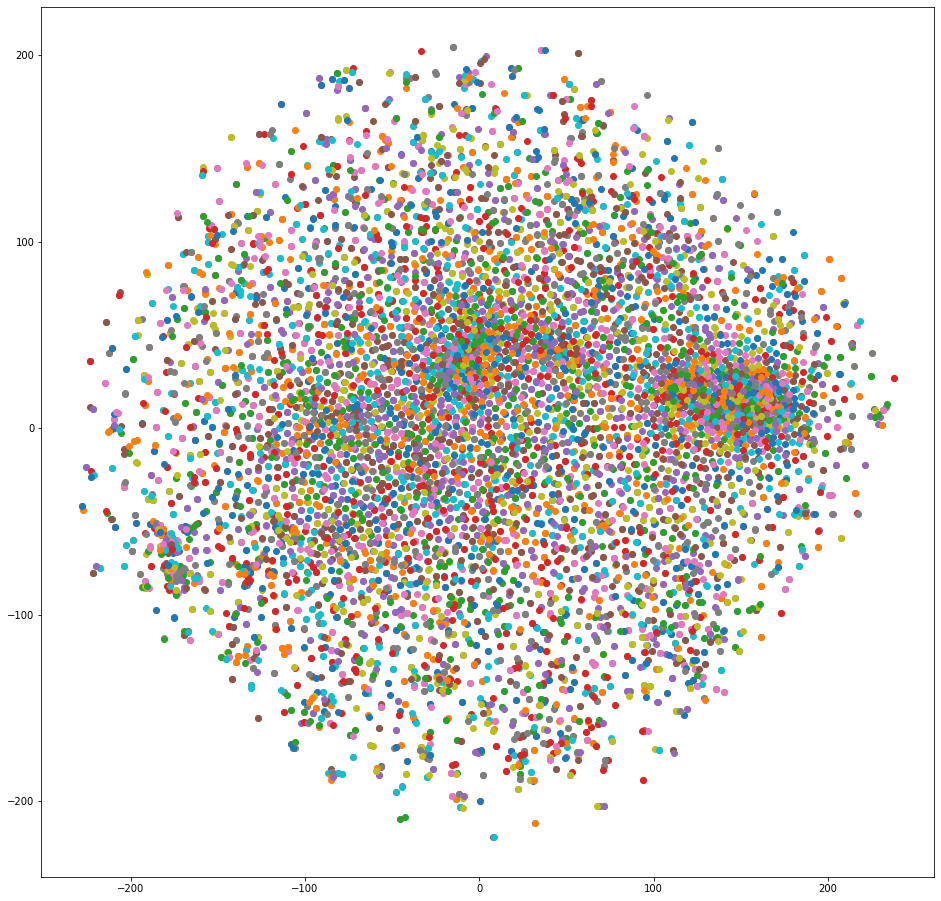

In [176]:
tsne_plot(test_key)

In [177]:
total_key = train_key + test_key

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


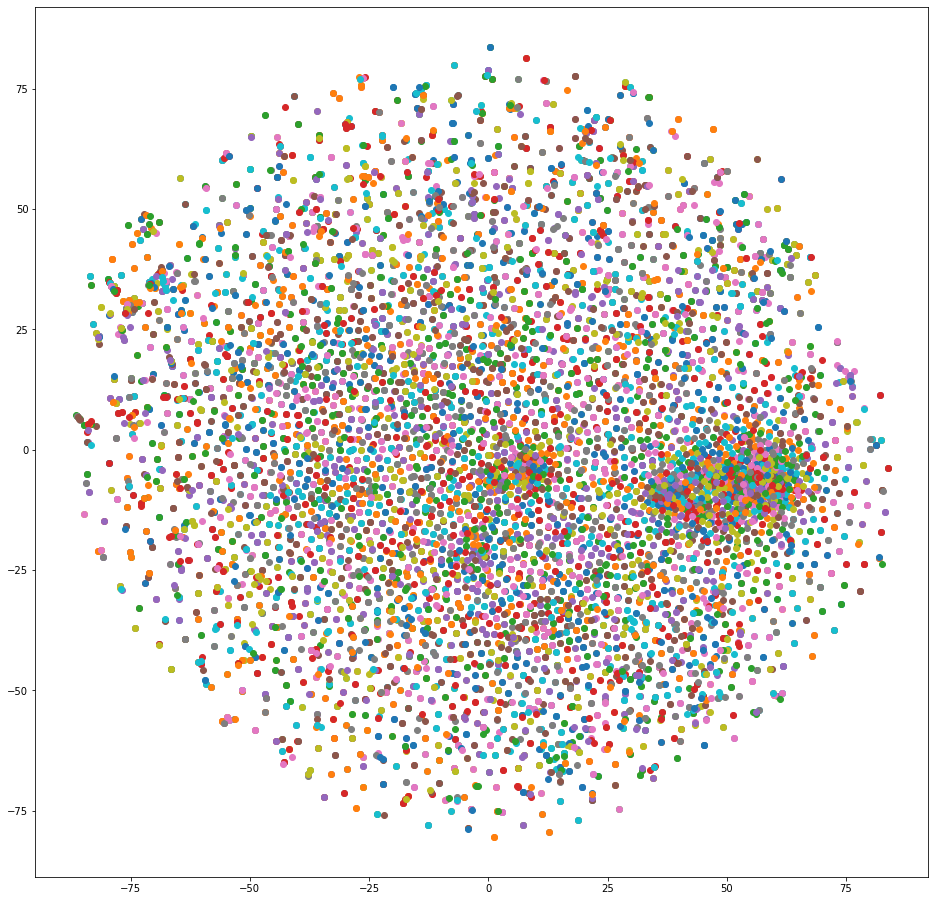

In [192]:
tsne_plot(total_key)

In [162]:
# labels = []
# tokens = []

# for word in train_key:
#     if word in embedding_index:
#         tokens.append(embedding_index[word])
#         labels.append(word)

In [170]:
# np.array(tokens)

In [168]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(np.array(tokens))

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [160]:
tsne_plot(train_key)

AttributeError: 'list' object has no attribute 'shape'

In [58]:
only_train = []
for i in range(len(train_key)):
    if train_key[i] not in test_key_0:
        only_train.append(train_key[i])

In [59]:
len(only_train)

557

In [218]:
only_train

['pip',
 'paste',
 'rotate',
 'gameplay',
 'blurred',
 'simultaneous',
 'splitting',
 'authentication',
 'bell',
 'vertual',
 'rotation',
 'skins',
 'text',
 'stereo',
 'splashed',
 'stickers',
 'flag',
 'facetime',
 'missions',
 'pen',
 'airplay',
 'pair',
 'dutch',
 'imported',
 'replacement',
 'taskbar',
 'vertical',
 'axis',
 'horizontal',
 'regestration',
 'dp',
 'emoticons',
 'table',
 'tapping',
 'mirrored',
 'incoming',
 'cards',
 'assign',
 'portal',
 '1132',
 'australia',
 'workers',
 'charts',
 'significantly',
 'skin',
 'surface',
 'mir',
 'rotates',
 'approval',
 'posts',
 'ping',
 'confib',
 'minis',
 '104101',
 'pfp',
 '403',
 'handwriting',
 'flipping',
 'invitees',
 'isolate',
 'slider',
 'aids',
 'drawing',
 'attachments',
 'adapter',
 'weblink',
 '2fa',
 'authenticator',
 'recall',
 'scan',
 'entrance',
 'sections',
 'exchange',
 'demonstrating',
 'blurs',
 'unblur',
 'passcodes',
 'configurability',
 'foreign',
 'relationships',
 '1142',
 'expression',
 'froze',
 'd

In [62]:
only_test_0 = []
for i in range(len(test_key_0)):
    if test_key_0[i] not in train_key:
        only_test_0.append(test_key_0[i])

In [65]:
len(only_test_0)

3961

In [219]:
only_test_0

['it',
 'i',
 'now',
 'me',
 'this',
 'in',
 'all',
 'again',
 'that',
 'on',
 'am',
 'you',
 'up',
 'is',
 'off',
 'have',
 'sure',
 'cache',
 'not',
 '2022',
 'more',
 'there',
 'here',
 'films',
 'to',
 'unless',
 'we',
 'helped',
 'them',
 'short',
 'do',
 'prime',
 'happen',
 'too',
 'what',
 'and',
 'customers',
 'so',
 'happening',
 'are',
 'premium',
 'three',
 'finally',
 'oh',
 'no',
 'down',
 'bring',
 'deleting',
 'verification',
 'location',
 'response',
 'garbage',
 'including',
 'logo',
 'appreciate',
 'immediately',
 'clearing',
 'catalog',
 'for',
 'job',
 'whatever',
 'honestly',
 'fan',
 'rewind',
 'restarting',
 'media',
 'event',
 'enjoyed',
 'jehovah',
 'why',
 'nonsense',
 'restarted',
 'bought',
 'mostly',
 'neither',
 'adds',
 'case',
 'profiles',
 'guy',
 'somewhat',
 'asked',
 'per',
 'probably',
 'side',
 'commercial',
 're',
 'manually',
 '22',
 'bc',
 'technology',
 'documentaries',
 'within',
 'buggy',
 'mean',
 'with',
 'move',
 'search',
 'clients',
 'f

In [66]:
only_test_1 = []
for i in range(len(test_key_1)):
    if test_key_1[i] not in train_key:
        only_test_1.append(test_key_1[i])

In [70]:
only_test_11 = []
for i in range(len(test_key_1)):
    if test_key_1[i] not in test_key_0:
        only_test_11.append(test_key_1[i])

In [72]:
len(only_test_11)

855

In [69]:
only_test_1

['it',
 'in',
 'all',
 'again',
 'me',
 'now',
 'that',
 'there',
 'up',
 'on',
 'adds',
 'this',
 'garbage',
 'i',
 'cache',
 'premium',
 'logo',
 'more',
 'sure',
 'them',
 'restarting',
 'circle',
 'you',
 'canceling',
 'and',
 'probably',
 'restarted',
 'incredible',
 'for',
 'clearing',
 'not',
 'films',
 'deleting',
 'per',
 'no',
 'to',
 'successful',
 'have',
 'mean',
 'off',
 'is',
 'do',
 'mins',
 'satisfied',
 'itself',
 'puts',
 'fan',
 'customers',
 'tools',
 'too',
 'third',
 '2022',
 '22',
 'commercial',
 'here',
 'happen',
 'so',
 'finally',
 's20',
 'luck',
 'three',
 'prime',
 '5g',
 'n',
 'rid',
 'catalog',
 'helped',
 'tho',
 'enjoying',
 'immediately',
 'damn',
 'news',
 'vedio',
 '90',
 'buggy',
 'launched',
 'waited',
 'deserves',
 'accessing',
 'serial',
 'wow',
 'death',
 'period',
 'unless',
 'down',
 'while',
 'ending',
 'location',
 'spinning',
 'huge',
 'collaboration',
 'tech',
 'refuses',
 's10',
 'alone',
 'freezing',
 'within',
 'barely',
 'honestly',
 

In [55]:
train_key

['want',
 'app',
 'good',
 'zoom',
 'unable',
 'video',
 'screen',
 'meeting',
 'use',
 'background',
 'bad',
 'quality',
 'phone',
 'audio',
 'time',
 'android',
 'update',
 'connect',
 'work',
 'add',
 'sound',
 'option',
 'meetings',
 'please',
 'working',
 'tv',
 'change',
 'application',
 'mobile',
 'watch',
 'picture',
 'even',
 'download',
 'ipad',
 'virtual',
 'get',
 'open',
 'version',
 'put',
 'account',
 'getting',
 'without',
 'able',
 'camera',
 'chat',
 'login',
 'movies',
 'sign',
 'join',
 'language',
 'enter',
 'issues',
 'poor',
 'settings',
 'error',
 'devices',
 'install',
 'tablet',
 'online',
 'better',
 'connection',
 'share',
 'let',
 'slow',
 'class',
 'like',
 'play',
 'conference',
 'service',
 'password',
 'support',
 'device',
 'using',
 'cannot',
 'room',
 'subtitles',
 'watching',
 'would',
 'people',
 'data',
 'need',
 'live',
 'problem',
 'great',
 'crashes',
 'could',
 'turn',
 'easy',
 'profile',
 'facing',
 'one',
 'keeps',
 'classes',
 'access',
 '

In [56]:
test_key_0

['app',
 'good',
 'want',
 'zoom',
 'unable',
 'meeting',
 'use',
 'movies',
 'disney',
 'watch',
 'online',
 'meetings',
 'conducting',
 'time',
 'video',
 'content',
 'update',
 'tv',
 'like',
 'subscription',
 'watching',
 'phone',
 'bad',
 'work',
 'even',
 'download',
 'screen',
 'play',
 'shows',
 'quality',
 'great',
 'hulu',
 'videos',
 'love',
 'application',
 'get',
 'audio',
 'one',
 'better',
 'connect',
 'would',
 'getting',
 'streaming',
 'it',
 'account',
 'episodes',
 'service',
 'issues',
 'lot',
 'please',
 'error',
 'netflix',
 'also',
 'enter',
 'open',
 'need',
 'ads',
 'load',
 'slow',
 'people',
 'series',
 'working',
 'login',
 'many',
 'problem',
 'really',
 'still',
 'classes',
 'times',
 'new',
 'keeps',
 'see',
 'best',
 'background',
 'fix',
 'sound',
 'much',
 'episode',
 'option',
 'internet',
 'well',
 'android',
 'connection',
 'could',
 'install',
 '1',
 'know',
 'able',
 'mobile',
 'every',
 'serials',
 'change',
 'cancel',
 'without',
 'problems',
 '

## plot datasets


In [73]:
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [197]:
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (3,3))),
    ('tfidf', TfidfTransformer()),
])     

In [198]:
test_data['label'].values

array([1., 0., 0., ..., 0., 0., 0.])

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


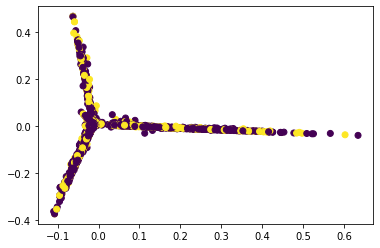

In [199]:
X = pipeline.fit_transform(test_pair_data).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=test_data['label'].values)
plt.show()     

In [200]:
##tsne
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(9000, 2)

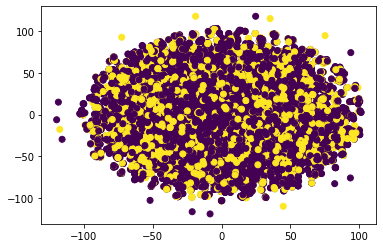

In [88]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=test_data['label'].values)
plt.show()

## one class svm


In [89]:
from sklearn.svm import OneClassSVM

In [95]:
np.shape(X)

(9000, 6667)

In [97]:
len(train_pair_data)

2061

In [106]:
#on train set tfidf
X = pipeline.fit_transform(train_pair_data).todense()


In [100]:
len(X)

2061

In [101]:
one_svm = OneClassSVM(gamma='auto', nu=0.01).fit(X)

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [107]:
X_test = pipeline.transform(test_pair_data).todense()

In [109]:
y_test_pred = one_svm.predict(X_test)

/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [116]:
res = []
for i in range(len(y_test_pred)):
    if y_test_pred[i] == -1:
        res.append(0)
    else:
        res.append(1)

In [119]:
from sklearn.metrics import classification_report,roc_auc_score
y_true = test_data['label'].values

In [118]:
print(classification_report(y_true,res))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76      5999
         1.0       0.32      0.10      0.16      3001

    accuracy                           0.63      9000
   macro avg       0.49      0.50      0.46      9000
weighted avg       0.55      0.63      0.56      9000



In [120]:
roc_auc_score(y_true,res)

0.4971401986968949